In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## Загрузка данных

In [3]:
df_restoran = pd.read_excel(r'd:\Работа ВВЮ\DataScience\Final project\Restoran.xlsx')

In [4]:
df_restoran.head()

,Торговое предприятие,Категория,Подкатегория,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-02 21:43:40,35479,1.0,300.0,196.10
1,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-03 19:17:07,35660,0.5,150.0,98.05
2,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-03 21:55:55,35662,0.5,150.0,98.05
3,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-05 18:24:26,35908,1.0,300.0,196.10
4,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-25 13:00:03,36622,3.0,900.0,514.01


## Общая информация


In [5]:
df_restoran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77827 entries, 0 to 77826
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Торговое предприятие    77827 non-null  object        
 1   Категория               77827 non-null  object        
 2   Подкатегория            77827 non-null  object        
 3   Блюдо                   77827 non-null  object        
 4   Время открытия          77827 non-null  datetime64[ns]
 5   Номер чека              77827 non-null  int64         
 6   Количество блюд         77827 non-null  float64       
 7   Сумма со скидкой, грн.  77827 non-null  float64       
 8   Себестоимость, грн.     77827 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 5.3+ MB


In [6]:
df_restoran.describe()

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
count,77827.000000,77827.000000,77827.000000,77827.000000
mean,51037.208193,1.528022,131.164796,47.493007
std,9141.079876,1.576799,177.715656,62.824646
min,35277.000000,0.000000,0.000000,0.000000
25%,43042.000000,1.000000,30.000000,10.481250
50%,50971.000000,1.000000,78.000000,25.740000
75%,59056.000000,2.000000,168.000000,65.235000
max,66643.000000,140.000000,4276.000000,1843.748571


In [7]:
df_restoran.isnull().sum()

Торговое предприятие      0
Категория                 0
Подкатегория              0
Блюдо                     0
Время открытия            0
Номер чека                0
Количество блюд           0
Сумма со скидкой, грн.    0
Себестоимость, грн.       0
dtype: int64

In [8]:
df_restoran.index[df_restoran.isnull().any(axis=1)]

Int64Index([], dtype='int64')

 ## Группировка по категориям


In [9]:
df_group = df_restoran.groupby(['Категория'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()

<ipython-input-9-4fc498e44856>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df_restoran.groupby(['Категория'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()


In [10]:
df_group.reset_index()

,Категория,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Інше,1071.000,22393.44,7.066890e+03
1,Алкоголь,3556.040,866710.90,3.767206e+05
2,Бургери,938.000,150706.77,5.553918e+04
3,Гарніри,1282.000,59884.80,1.764848e+04
4,Гарячі закуски,925.000,162605.22,5.577398e+04
5,Десерти,7308.800,399755.05,1.208970e+05
6,М'ясо,1500.000,326380.86,9.673186e+04
7,Напої б/а,52193.795,984552.61,2.965499e+05
8,Новинки,570.000,119095.92,4.634720e+04
9,Пиво,3812.700,159692.50,7.649084e+04


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

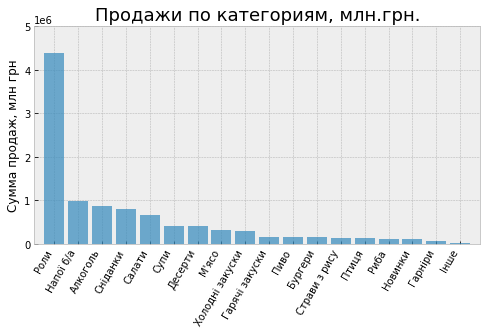

In [75]:
fig, ax = plt.subplots(figsize = (8,4))

df_group_sort=df_group.sort_values('Сумма со скидкой, грн.', ascending=[False])

ax.vlines(x=df_group_sort.index, ymin = 0, ymax=df_group_sort['Сумма со скидкой, грн.'], alpha=0.7, linewidth=20 )

ax.set_title('Продажи по категориям, млн.грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 5000000))
plt.xticks( rotation=60, horizontalalignment='right')



In [12]:
df_group_sort.reset_index()

,Категория,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Роли,18199.000,4385211.78,1.435554e+06
1,Напої б/а,52193.795,984552.61,2.965499e+05
2,Алкоголь,3556.040,866710.90,3.767206e+05
3,Сніданки,11763.000,803488.71,5.325468e+05
4,Салати,6037.000,664650.25,2.113815e+05
5,Супи,4721.000,409343.89,1.364030e+05
6,Десерти,7308.800,399755.05,1.208970e+05
7,М'ясо,1500.000,326380.86,9.673186e+04
8,Холодні закуски,2379.000,303283.53,1.072214e+05
9,Гарячі закуски,925.000,162605.22,5.577398e+04


## Выделяем крупнейшую категорию


In [13]:
df_restoran_rol=df_restoran.loc[df_restoran['Категория'] == 'Роли']
df_restoran_rol = df_restoran_rol[df_restoran_rol['Время открытия'] > '2021-05-01']
df_restoran_rol

,Торговое предприятие,Категория,Подкатегория,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
46005,Ресторан,Роли,Роли,Гарячий рол з лососем та манго,2021-05-03 12:53:36,46066,1.0,92.50,68.130
46006,Ресторан,Роли,Роли,Гарячий рол з лососем та манго,2021-05-05 15:25:21,46249,1.0,185.00,68.085
46007,Ресторан,Роли,Роли,Гарячий рол з лососем та манго,2021-05-05 20:06:36,46301,1.0,185.00,68.085
46008,Ресторан,Роли,Роли,Гарячий рол з лососем та манго,2021-05-06 16:25:21,46363,1.0,185.00,68.220
46009,Ресторан,Роли,Роли,Гарячий рол з лососем та манго,2021-05-08 12:21:53,46563,1.0,185.00,68.695
...,...,...,...,...,...,...,...,...,...
60816,Ресторан,Роли,Роли - Суші,Хосомакі зі свіжим лососем,2021-08-24 12:52:42,65285,1.0,75.00,21.094
60817,Ресторан,Роли,Роли - Суші,Хосомакі зі свіжим лососем,2021-08-24 18:09:39,65385,1.0,75.00,21.094
60818,Ресторан,Роли,Роли - Суші,Хосомакі зі свіжим лососем,2021-08-24 20:27:26,65436,1.0,75.00,21.094
60819,Ресторан,Роли,Роли - Суші,Хосомакі зі свіжим лососем,2021-08-24 20:28:24,65437,2.0,124.66,42.188


[Text(0.5, 0, 'Дата')]

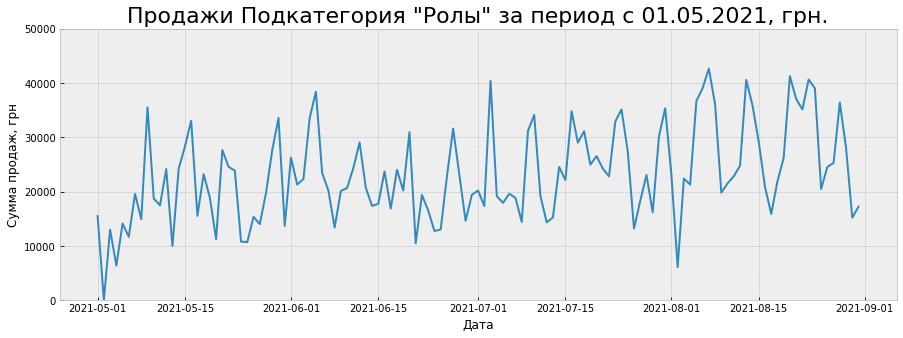

In [14]:
df_rol_daily=df_restoran_rol.groupby(pd.Grouper(key='Время открытия', freq='1D')).sum()

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_rol_daily['Сумма со скидкой, грн.'])

ax.set_title('Продажи Подкатегория "Ролы" за период с 01.05.2021, грн.', fontdict={'size':22})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 50000))
ax.set(xlabel='Дата')

In [15]:
df_restoran_rol_group = df_restoran_rol.groupby(['Подкатегория'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()

<ipython-input-15-15b13a3bb600>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_restoran_rol_group = df_restoran_rol.groupby(['Подкатегория'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()


## Выделяем подкатегорию

In [16]:
df_restoran_rol_group.reset_index()


,Подкатегория,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Роли,7630.0,1636957.24,543005.525667
1,Роли - Гункан,1767.0,52550.04,15469.870000
2,Роли - Суші,1115.0,50135.87,14955.190000
3,Роли - набір,1249.0,1105353.52,361437.420000


In [17]:
df_restoran_rol_bludo = df_restoran_rol.groupby(['Блюдо'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()

<ipython-input-17-2b1f9243bc7e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_restoran_rol_bludo = df_restoran_rol.groupby(['Блюдо'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()


In [18]:
df_restoran_rol_bludo.reset_index()

,Блюдо,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Гарячий рол Катана,255.0,47839.87,16075.78
1,Гарячий рол Сяке ясай темпура,148.0,22591.97,6621.18
2,Гарячий рол Сінобі,430.0,70794.91,23588.53
3,Гарячий рол з лососем та манго,302.0,53748.33,18743.27
4,Гранд набір Сенсей,204.0,201995.40,73828.88
...,...,...,...,...
61,Хосомакі з вугрем,21.0,2479.84,799.97
62,Хосомакі з копченим лососем,10.0,650.13,250.54
63,Хосомакі з огірком,79.0,2918.90,914.97
64,Хосомакі з тунцем,10.0,828.00,211.31


## Выделяем набор товаров с продажей более 50к грн

In [19]:
df_restoran_rol_bludo_group_sort=df_restoran_rol_bludo.sort_values('Сумма со скидкой, грн.', ascending=[False])
df_restoran_rol_bludo_group_sort_50000 = df_restoran_rol_bludo_group_sort.loc[df_restoran_rol_bludo_group_sort['Сумма со скидкой, грн.'] > 50000]
df_restoran_rol_bludo_group_sort_50000.reset_index()

,Блюдо,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Набір Філадельфія XL,335.0,356675.75,107767.510
1,Набір Філо Гранде,376.0,312689.32,106977.600
2,Набір Філадельфія,334.0,233993.05,72863.430
3,Гранд набір Сенсей,204.0,201995.40,73828.880
4,Рол Філ. Delux зі свіжим лососем,829.0,167951.51,51822.414
5,Рол з лососем та креветкою темпура,590.0,158411.33,57952.280
6,Рол Філ. Delux зі свіжим лососем XL,458.0,119100.89,34278.910
7,Рол Кранч,483.0,97003.96,35113.430
8,Рол Ебі чіз,338.0,80501.84,28105.330
9,Рол Філ. Delux дует,341.0,75427.01,25366.080


In [20]:
df_restoran_rol_bludo_group_sort_50000['Маржа, %'] = df_restoran_rol_bludo_group_sort_50000['Сумма со скидкой, грн.'] / df_restoran_rol_bludo_group_sort_50000['Себестоимость, грн.'] * 100

<ipython-input-20-59c8f3cb6e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restoran_rol_bludo_group_sort_50000['Маржа, %'] = df_restoran_rol_bludo_group_sort_50000['Сумма со скидкой, грн.'] / df_restoran_rol_bludo_group_sort_50000['Себестоимость, грн.'] * 100


In [21]:
df_restoran_rol_bludo_group_sort_50000

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.","Маржа, %"
Блюдо,,,,
Набір Філадельфія XL,335.0,356675.75,107767.510,330.967794
Набір Філо Гранде,376.0,312689.32,106977.600,292.294200
Набір Філадельфія,334.0,233993.05,72863.430,321.139219
Гранд набір Сенсей,204.0,201995.40,73828.880,273.599437
Рол Філ. Delux зі свіжим лососем,829.0,167951.51,51822.414,324.090479
Рол з лососем та креветкою темпура,590.0,158411.33,57952.280,273.347882
Рол Філ. Delux зі свіжим лососем XL,458.0,119100.89,34278.910,347.446549
Рол Кранч,483.0,97003.96,35113.430,276.258856
Рол Ебі чіз,338.0,80501.84,28105.330,286.429087


<ipython-input-77-9dd2a2d2f06f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(m_ticks, rotation = 50, horizontalalignment='right')


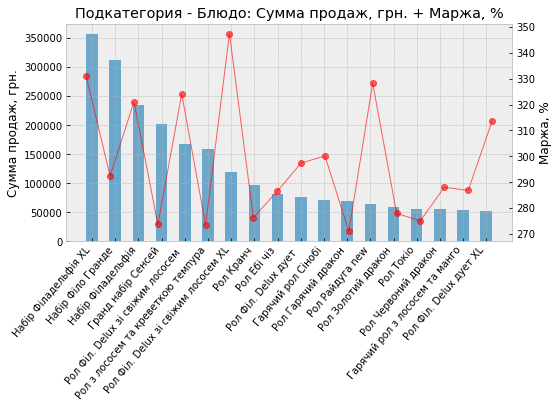

In [77]:
fig=plt.figure(figsize = (8,4))

ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax1.bar(df_restoran_rol_bludo_group_sort_50000.index, df_restoran_rol_bludo_group_sort_50000['Сумма со скидкой, грн.'], alpha=0.7, linewidth=15, width = 0.5)
ax1.set_ylabel("Сумма продаж, грн.")

m_ticks=[]
for el in df_restoran_rol_bludo_group_sort_50000.index:
    m_ticks.append(el)
    
#ax1.set_xticks(m_ticks)
ax1.set_xticklabels(m_ticks, rotation = 50, horizontalalignment='right')
ax1.set_title('Подкатегория - Блюдо: Сумма продаж, грн. + Маржа, %')

ax2.plot(df_restoran_rol_bludo_group_sort_50000.index, df_restoran_rol_bludo_group_sort_50000['Маржа, %'], 'r',linewidth = 1, marker = 'o', alpha=0.6)
ax2.yaxis.tick_right()
ax2.grid(b=False)
ax2.set_xticks([])
ax2.set_ylabel("Маржа, %")
ax2.yaxis.set_label_position('right')



## Группировка по времени

### Группировка по дню недели


In [23]:
df_restoran_group_weekday=df_restoran.groupby(df_restoran['Время открытия'].dt.weekday).sum()


In [24]:
df_restoran_group_weekday.reset_index()

,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,0,468147529,14394.910,1196709.24,427491.569433
1,1,502030259,14160.040,1182187.85,430066.785013
2,2,473818086,13632.800,1161176.96,415266.991536
3,3,501269094,14563.895,1183066.56,424404.136106
4,4,595396736,17257.115,1619788.62,586937.822603
5,5,729145391,22678.985,2046340.74,735333.236262
6,6,702265707,22233.590,1818892.63,676737.700416


[Text(0.5, 0, 'День недели')]

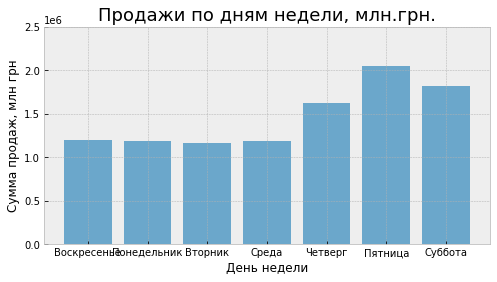

In [76]:
fig, ax = plt.subplots(figsize = (8,4))

xticks1 = ['Воскресенье','Понедельник','Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота']

plt.bar(df_restoran_group_weekday.index, df_restoran_group_weekday['Сумма со скидкой, грн.'], tick_label = xticks1, alpha=0.7, linewidth=10)
ax.set_title('Продажи по дням недели, млн.грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 2500000))
ax.set(xlabel='День недели')

## Группировка по месяцам

In [26]:
df_restoran_group_month = df_restoran[df_restoran['Время открытия'] >= '2021-01-01'].groupby(df_restoran['Время открытия'].dt.month).sum()
df_restoran_group_month

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Время открытия,,,,
1,186392339,7631.570,700789.84,251858.844500
2,404824117,15409.885,1358792.66,494382.380361
3,469739573,16472.265,1422745.75,511077.532145
4,18883015,862.250,52854.48,19624.681776
5,482264825,15064.970,1324072.91,488439.635214
6,620017885,17939.770,1515957.51,542330.772098
7,806077856,21629.455,1798065.08,649175.393773
8,983873192,23911.170,2034884.37,739349.001501


[Text(0.5, 0, 'Номер месяца')]

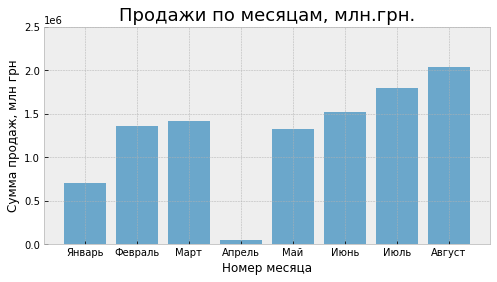

In [79]:
fig, ax = plt.subplots(figsize = (8,4))
xticks2 = ['Январь','Февраль','Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август' ]
plt.bar(df_restoran_group_month.index, df_restoran_group_month['Сумма со скидкой, грн.'], tick_label = xticks2, alpha=0.7, linewidth=10)
ax.set_title('Продажи по месяцам, млн.грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 2500000))
ax.set(xlabel='Номер месяца')

In [28]:
df_restoran_group_week=df_restoran.groupby(df_restoran['Время открытия'].dt.isocalendar().week).sum()

In [29]:
df_restoran_group_week

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
week,,,,
1,54526282,2141.760,203500.84,72658.268333
3,2324611,416.250,26226.00,9978.829442
4,94740598,3642.120,332693.67,120082.125296
5,93584834,3645.220,325966.78,119489.680326
6,104584860,4133.300,378557.18,141341.620956
7,98746464,3703.250,322374.54,117370.291140
8,107907959,3928.115,331894.16,116180.787939
9,116154758,4275.215,376790.48,131883.517436
10,128117552,4475.705,408907.34,144656.058014


[Text(0.5, 0, 'Номер недели')]

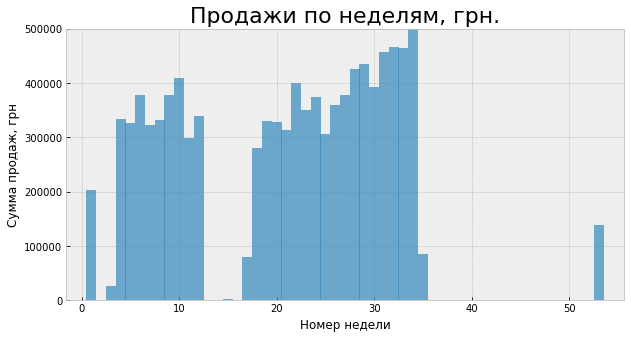

In [30]:
fig, ax = plt.subplots(figsize = (10,5))

ax.vlines(x = df_restoran_group_week.index, ymin = 0, ymax=df_restoran_group_week['Сумма со скидкой, грн.'], alpha=0.7, linewidth=10)

ax.set_title('Продажи по неделям, грн.', fontdict={'size':22})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 500000))
ax.set(xlabel='Номер недели')

In [31]:
df_restoran_group_week_april=df_restoran[(df_restoran['Время открытия'].dt.isocalendar().week != 14) & (df_restoran['Время открытия'].dt.isocalendar().week != 15) & (df_restoran['Время открытия'].dt.isocalendar().week != 16) ].groupby(df_restoran['Время открытия'].dt.isocalendar().week).sum()

In [32]:
df_restoran_group_week_april['Correct_week'] = df_restoran_group_week_april.index + 1
df_restoran_group_week_april.loc[53, 'Correct_week'] = 1
df_restoran_group_week_april

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Correct_week
week,,,,,
1,54526282,2141.760,203500.84,72658.268333,2
3,2324611,416.250,26226.00,9978.829442,4
4,94740598,3642.120,332693.67,120082.125296,5
5,93584834,3645.220,325966.78,119489.680326,6
6,104584860,4133.300,378557.18,141341.620956,7
7,98746464,3703.250,322374.54,117370.291140,8
8,107907959,3928.115,331894.16,116180.787939,9
9,116154758,4275.215,376790.48,131883.517436,10
10,128117552,4475.705,408907.34,144656.058014,11


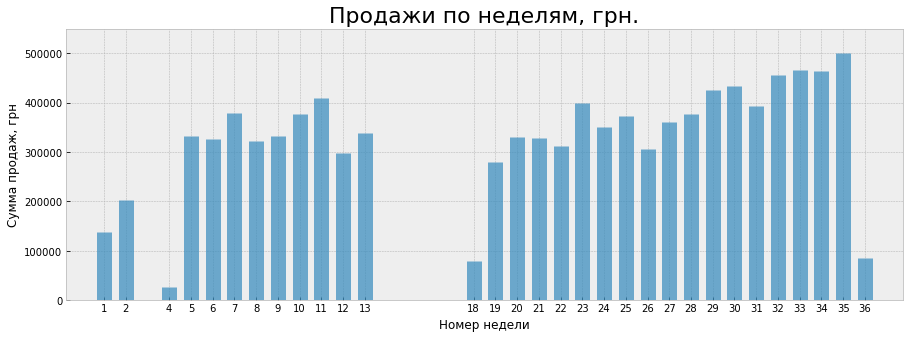

In [33]:
fig, ax = plt.subplots(figsize = (15,5))

ax.vlines(x = df_restoran_group_week_april['Correct_week'], ymin = 0, ymax=df_restoran_group_week_april['Сумма со скидкой, грн.'], alpha=0.7, linewidth=15)

ax.set_title('Продажи по неделям, грн.', fontdict={'size':22})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 550000))
ax.set(xlabel='Номер недели')

m_ticks = []
for el in df_restoran_group_week_april['Correct_week']:
    m_ticks.append(el)
ax.set_xticks(m_ticks)
ax.grid(True)

In [34]:
df_restoran_group_week_april_copy = df_restoran_group_week_april.copy()


In [35]:
df_restoran_group_week_april_copy_sort = df_restoran_group_week_april_copy.sort_values('Correct_week', ascending=[True])


In [36]:
df_restoran_group_week_april_copy_sort_0_index = df_restoran_group_week_april_copy_sort.reset_index()

[Text(0.5, 0, 'Номер месяца')]

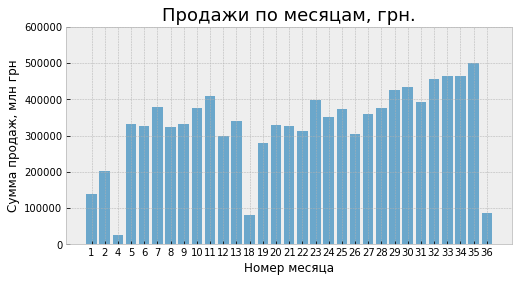

In [80]:
fig, ax = plt.subplots(figsize = (8,4))
m_ticks = []
for el in df_restoran_group_week_april_copy_sort_0_index['Correct_week']:
    m_ticks.append(el)
plt.bar(df_restoran_group_week_april_copy_sort_0_index.index, df_restoran_group_week_april_copy_sort_0_index['Сумма со скидкой, грн.'], tick_label = m_ticks, alpha=0.7, linewidth=10)
ax.set_title('Продажи по месяцам, грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 600000))
ax.set(xlabel='Номер месяца')

### Группировка по часу суток

In [38]:
df_restoran_group_hour = df_restoran.groupby(df_restoran['Время открытия'].dt.hour).sum()
df_restoran_group_hour

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Время открытия,,,,
8,7227449,364.150,19978.41,7758.029069
9,287982450,12964.845,720650.24,311583.599099
10,288919445,12543.950,501205.78,260285.256647
11,333027231,12937.425,576788.99,281912.083960
12,273755515,7546.655,650221.54,217950.340471
13,319224035,8376.725,746028.86,251810.701341
14,293977618,7810.695,736995.76,245555.326284
15,259829315,6870.580,667864.03,220634.878624
16,253045146,6690.920,702553.57,237789.527151


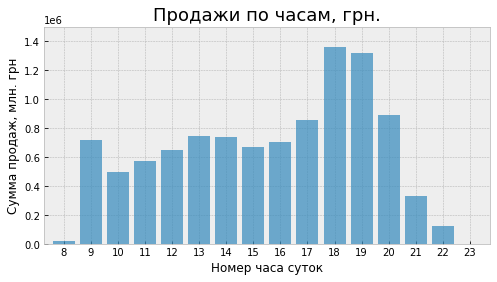

In [81]:
fig, ax = plt.subplots(figsize = (8,4))

ax.vlines(x = df_restoran_group_hour.index, ymin = 0, ymax=df_restoran_group_hour['Сумма со скидкой, грн.'], alpha=0.7, linewidth=22)

ax.set_title('Продажи по часам, грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн. грн', ylim=(0, 1500000))
ax.set(xlabel='Номер часа суток')

m_ticks = np.arange(8, 24, 1)
ax.set_xticks(m_ticks)
ax.grid(True)

### Времянной ряд

In [40]:
df__sort=df_restoran.sort_values('Время открытия', ascending=[True])

In [41]:
df__sort

,Торговое предприятие,Категория,Подкатегория,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
15196,Ресторан,Напої б/а,Напої б/а - Кава,Кава Американо,2021-01-01 12:07:29,35277,3.0,84.0,18.603333
2131,Ресторан,Алкоголь,Алкоголь - Крепкий,2208201200 Коньяк Хеннессі VS 1л,2021-01-01 12:14:11,35279,0.1,360.0,140.530000
20002,Ресторан,Напої б/а,Напої б/а - Кава,Кава персонал,2021-01-01 12:24:27,35280,3.0,15.0,14.226818
28133,Ресторан,Напої б/а,Напої б/а - Додатки,Молоко 50г,2021-01-01 12:24:27,35280,5.0,25.0,6.676471
73479,Ресторан,Супи,Супи,Рамен з куркою,2021-01-01 12:24:27,35280,1.0,35.0,15.053333
...,...,...,...,...,...,...,...,...,...
19147,Ресторан,Напої б/а,Напої б/а - Кава,Кава Капучіно,2021-08-31 20:35:53,66634,1.0,35.0,11.225455
34738,Ресторан,Напої б/а,Напої б/а - Газ нап,Пепсі-Кола 500мл,2021-08-31 20:49:37,66629,2.0,60.0,22.960000
57716,Ресторан,Роли,Роли,Рол Філ. Delux зі свіжим лососем,2021-08-31 20:49:37,66629,3.0,645.0,187.672000
27707,Ресторан,Напої б/а,Напої б/а - не газ нап,Лимонад маракуйя з апельсином,2021-08-31 20:49:37,66629,1.0,45.0,14.056471


In [42]:
df_daily=df__sort.groupby(pd.Grouper(key='Время открытия', freq='1D')).sum()

[Text(0.5, 0, 'Дата')]

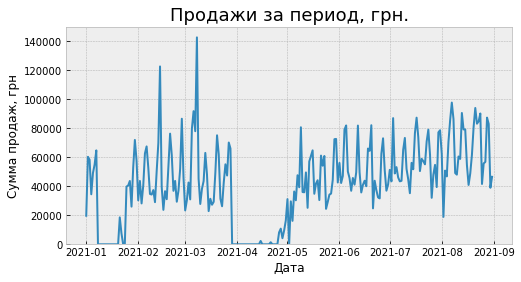

In [78]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(df_daily['Сумма со скидкой, грн.'])

ax.set_title('Продажи за период, грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 150000))
ax.set(xlabel='Дата')

## Средний чек


In [44]:
df_chek=df_restoran.groupby(df_restoran['Номер чека']).sum()
df_chek

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Номер чека,,,
35277,3.0,84.0,18.603333
35279,0.1,360.0,140.530000
35280,9.0,75.0,35.956622
35281,2.0,10.0,6.077567
35282,19.0,2391.0,692.678750
...,...,...,...
66638,7.0,868.0,245.110667
66639,2.3,404.0,204.590000
66640,11.0,1910.0,543.930409


In [45]:
df_chek.describe()

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
count,23430.000000,23430.000000,23430.000000
mean,5.075601,435.687691,157.756647
std,6.179538,635.053469,202.333392
min,0.000000,0.000000,0.000000
25%,2.000000,88.000000,41.370292
50%,4.000000,248.000000,110.053083
75%,6.000000,569.000000,204.920491
max,194.000000,16960.000000,5111.849082


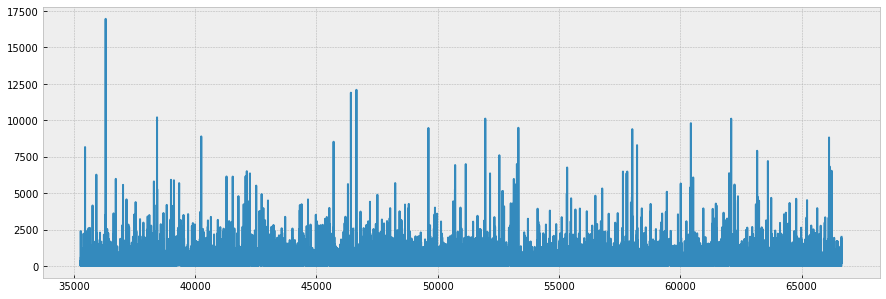

In [46]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_chek['Сумма со скидкой, грн.'])

[Text(0.5, 0, 'Сумма продаж')]

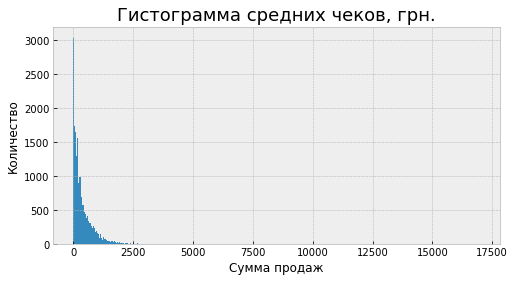

In [86]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(df_chek['Сумма со скидкой, грн.'], bins = 500)

ax.set_title('Гистограмма средних чеков, грн.', fontdict={'size':18})
ax.set(ylabel='Количество', ylim=(0, 3200))
ax.set(xlabel='Сумма продаж')

<AxesSubplot:xlabel='Сумма со скидкой, грн.', ylabel='Count'>

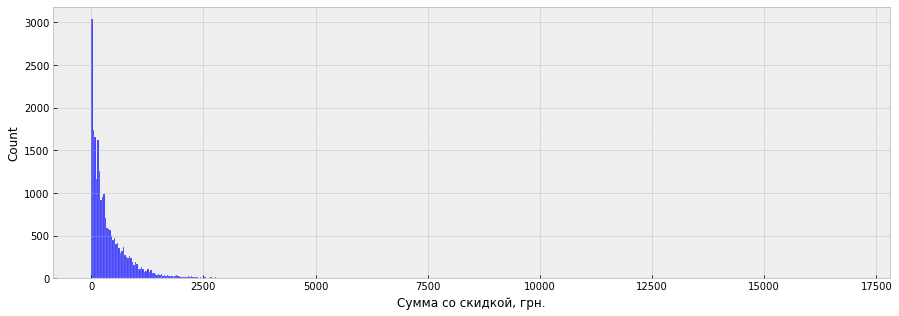

In [47]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(df_chek['Сумма со скидкой, грн.'])

### Группировка по стоимость до 100 грн за чек

In [48]:
df_chek_0_100=df_chek[df_chek['Сумма со скидкой, грн.'] < 100]
df_chek_0_100['Margin'] = round( df_chek_0_100['Сумма со скидкой, грн.'] / df_chek_0_100['Себестоимость, грн.'] * 100, 2)
df_chek_0_100

<ipython-input-48-2513393e2b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chek_0_100['Margin'] = round( df_chek_0_100['Сумма со скидкой, грн.'] / df_chek_0_100['Себестоимость, грн.'] * 100, 2)


,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Номер чека,,,,
35277,3.0,84.0,18.603333,451.53
35280,9.0,75.0,35.956622,208.58
35281,2.0,10.0,6.077567,164.54
35284,1.0,39.0,23.650000,164.90
35287,1.0,24.0,6.000000,400.00
...,...,...,...,...
66578,1.0,65.0,16.120000,403.23
66588,2.0,60.0,5.525667,1085.84
66614,3.0,0.0,92.975455,0.00


### Группировка по стоимость от 100 грн до 7500 грн за чек

In [49]:
df_chek_100_7500=df_chek[(df_chek['Сумма со скидкой, грн.'] > 100) & (df_chek['Сумма со скидкой, грн.'] < 7500)]
df_chek_100_7500['Margin'] = round( df_chek_100_7500['Сумма со скидкой, грн.'] / df_chek_100_7500['Себестоимость, грн.'] * 100, 2)
df_chek_100_7500

<ipython-input-49-5fce4fec9381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chek_100_7500['Margin'] = round( df_chek_100_7500['Сумма со скидкой, грн.'] / df_chek_100_7500['Себестоимость, грн.'] * 100, 2)


,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Номер чека,,,,
35279,0.1,360.0,140.530000,256.17
35282,19.0,2391.0,692.678750,345.18
35285,3.0,261.0,89.488667,291.66
35286,10.0,560.0,182.103611,307.52
35288,15.0,617.0,185.743667,332.18
...,...,...,...,...
66638,7.0,868.0,245.110667,354.13
66639,2.3,404.0,204.590000,197.47
66640,11.0,1910.0,543.930409,351.15


### Группировка по стоимость от 7500 грн за чек

In [50]:
df_chek_7500=df_chek[df_chek['Сумма со скидкой, грн.'] > 7500]
df_chek_7500

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Номер чека,,,
35460,45.0,8159.0,2683.255262
36309,194.0,16960.0,5088.525732
38427,136.0,10197.9,3485.805466
40249,65.0,8890.0,2634.365762
45705,63.0,8525.0,2614.613186
46418,118.0,11892.0,3861.932263
46646,88.0,12089.0,3777.343332
49613,68.0,9469.0,2861.876393
51957,70.0,10112.0,3179.865687


### Пропорции после разделения

In [51]:
print('Количество чеков до 100 грн', round(len(df_chek_0_100 )/len(df_chek)*100, 2), '%')
print('Количество чеков от 100 до 7500 грн', round(len(df_chek_100_7500)/len(df_chek)*100, 2), '%')
print('Количество чеков от 7500 грн', round(len(df_chek_7500)/len(df_chek)*100, 2), '%')

Количество чеков до 100 грн 26.85 %
Количество чеков от 100 до 7500 грн 72.5 %
Количество чеков от 7500 грн 0.09 %


### Количество чеков до 100

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, Fut

<AxesSubplot:label='03e85f67-5bce-4d24-ab3e-685a6dad55f4', xlabel='Сумма со скидкой, грн.', ylabel='Density'>

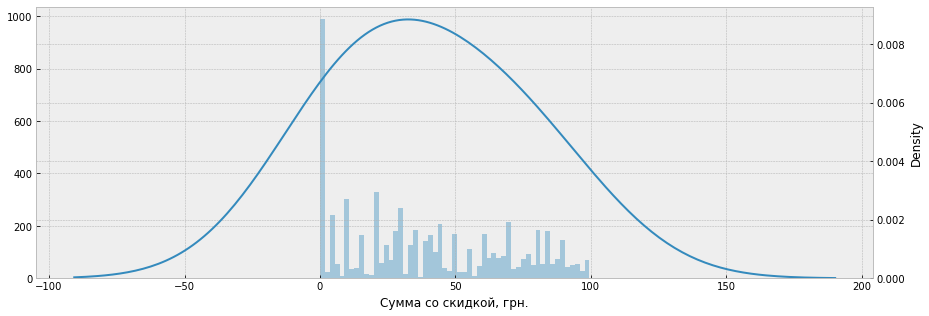

In [52]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax2 = ax1.twinx()

sns.distplot(df_chek_0_100['Сумма со скидкой, грн.'], kde=False, ax=ax1, bins = 55)
sns.distplot(df_chek_0_100['Сумма со скидкой, грн.'], hist=False, ax=ax2, kde_kws={'bw':1})

<AxesSubplot:xlabel='Номер чека', ylabel='Margin'>

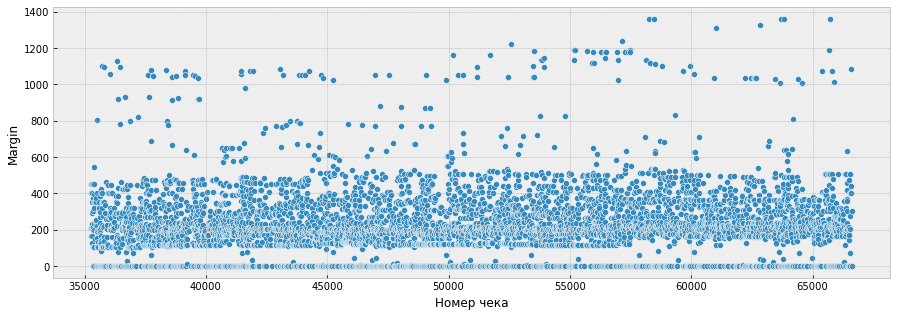

In [53]:
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(x=df_chek_0_100.index, y=df_chek_0_100['Margin'] )

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, Fut

<AxesSubplot:label='494a7696-cc49-4fa0-b0db-94dad0308961', xlabel='Margin', ylabel='Density'>

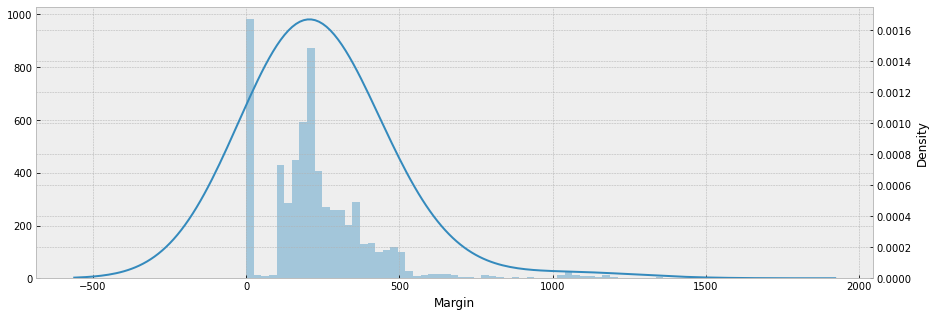

In [54]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax2 = ax1.twinx()

sns.distplot(df_chek_0_100['Margin'], kde=False, ax=ax1, bins = 55)
sns.distplot(df_chek_0_100['Margin'], hist=False, ax=ax2, kde_kws={'bw':1})


### Количество чеков от 100 до 7500

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, F

<AxesSubplot:label='bc23f789-40b4-46cd-bf61-fb31e3ed26e5', xlabel='Сумма со скидкой, грн.', ylabel='Density'>

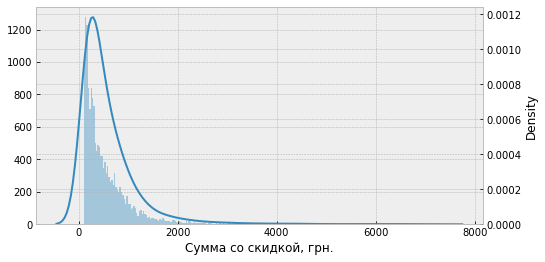

In [87]:
fig, ax1 = plt.subplots(figsize = (8,4))
ax2 = ax1.twinx()

sns.distplot(df_chek_100_7500['Сумма со скидкой, грн.'], kde=False, ax=ax1, bins = 255)
sns.distplot(df_chek_100_7500['Сумма со скидкой, грн.'], hist=False, ax=ax2, kde_kws={'bw':0.3})

<AxesSubplot:xlabel='Номер чека', ylabel='Margin'>

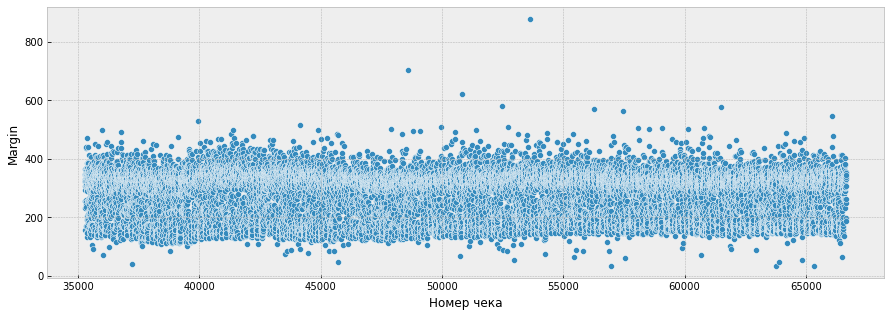

In [56]:
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(x=df_chek_100_7500.index, y=df_chek_100_7500['Margin'] )

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, F

<AxesSubplot:label='22121fa9-7db1-4a9d-a7b2-2d9be6e70ad8', xlabel='Margin', ylabel='Density'>

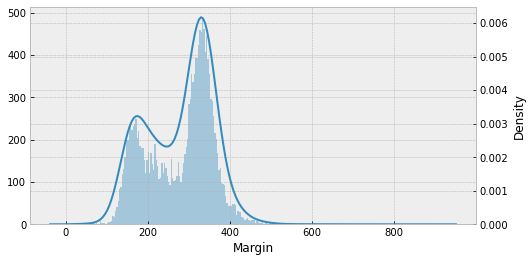

In [88]:
fig, ax1 = plt.subplots(figsize = (8,4))
ax2 = ax1.twinx()

sns.distplot(df_chek_100_7500['Margin'], kde=False, ax=ax1, bins = 255)
sns.distplot(df_chek_100_7500['Margin'], hist=False, ax=ax2, kde_kws={'bw':0.3})

### Средняя маржа по периодам

In [58]:
df_chek_100_7500_group_day=df_chek_100_7500.groupby(df_restoran['Время открытия'].dt.day).mean()

In [59]:
df_chek_100_7500_group=df_chek_100_7500.groupby(df_restoran['Время открытия'].dt.month).mean()


[Text(0.5, 0, 'Месяц')]

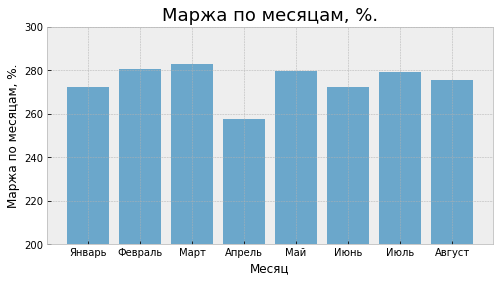

In [89]:
fig, ax = plt.subplots(figsize = (8,4))
xticks3 = ['Январь','Февраль','Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август' ]
plt.bar(df_chek_100_7500_group.index, df_chek_100_7500_group['Margin'], tick_label = xticks3, alpha=0.7, linewidth=10)
ax.set_title('Маржа по месяцам, %.', fontdict={'size':18})
ax.set(ylabel='Маржа по месяцам, %.', ylim=(200, 300))
ax.set(xlabel='Месяц')

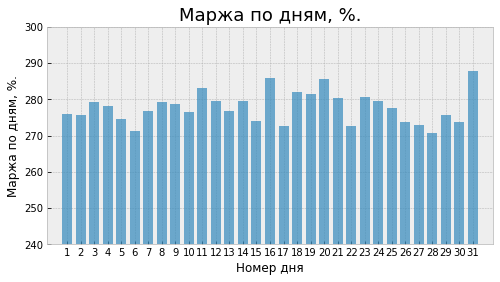

In [90]:
fig, ax = plt.subplots(figsize = (8,4))

ax.vlines(x = df_chek_100_7500_group_day.index, ymin = 0, ymax=df_chek_100_7500_group_day['Margin'], alpha=0.7, linewidth=10)

ax.set_title('Маржа по дням, %.', fontdict={'size':18})
ax.set(ylabel='Маржа по дням, %.', ylim=(240, 300))
ax.set(xlabel='Номер дня')

m_ticks = np.arange(1, 32, 1)
ax.set_xticks(m_ticks)
ax.grid(True)

### Средняя маржа по категориям

In [62]:
df_group['Margin'] = round( df_group['Сумма со скидкой, грн.'] / df_group['Себестоимость, грн.'] * 100, 2)
df_group

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Категория,,,,
Інше,1071.000,22393.44,7.066890e+03,316.88
Алкоголь,3556.040,866710.90,3.767206e+05,230.07
Бургери,938.000,150706.77,5.553918e+04,271.35
Гарніри,1282.000,59884.80,1.764848e+04,339.32
Гарячі закуски,925.000,162605.22,5.577398e+04,291.54
Десерти,7308.800,399755.05,1.208970e+05,330.66
М'ясо,1500.000,326380.86,9.673186e+04,337.41
Напої б/а,52193.795,984552.61,2.965499e+05,332.00
Новинки,570.000,119095.92,4.634720e+04,256.96


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

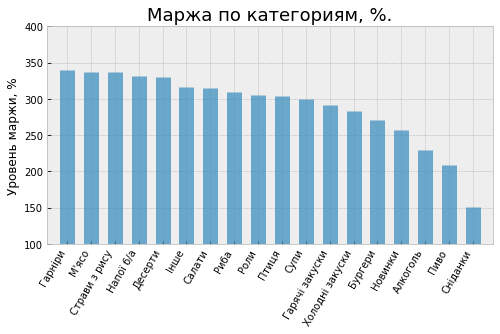

In [92]:
fig, ax = plt.subplots(figsize = (8,4))

df_group_sort_2=df_group.sort_values('Margin', ascending=[False])

ax.vlines(x=df_group_sort_2.index, ymin = 0, ymax=df_group_sort_2['Margin'], alpha=0.7, linewidth=15 )

ax.set_title('Маржа по категориям, %.', fontdict={'size':18})
ax.set(ylabel='Уровень маржи, %', ylim=(100, 400))
plt.xticks( rotation=60, horizontalalignment='right')


In [64]:
df_podcat=df_restoran.groupby(df_restoran['Подкатегория']).sum()
df_podcat['Margin'] = round( df_podcat['Сумма со скидкой, грн.'] / df_podcat['Себестоимость, грн.'] * 100, 2)
df_podcat_sort=df_podcat.sort_values('Margin', ascending=[False])
df_podcat_sort

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Подкатегория,,,,,
Напої б/а - Чай,122647260,2766.000,79768.44,13147.680000,606.71
Десерти - Морозиво,68098518,2013.000,46649.18,12284.456667,379.74
Напої б/а - не газ нап,243069721,6895.500,202261.27,53899.653500,375.26
Напої б/а - К-ль,111974836,2706.000,131804.40,35509.119444,371.18
Напої б/а - Додатки,342659226,19963.055,96079.41,27611.097334,347.97
Роли - Суші,51198433,1741.000,76678.88,22482.650000,341.06
Роли - Гункан,74353614,2785.000,81149.65,23840.800000,340.38
Гарніри,46189468,1282.000,59884.80,17648.480000,339.32
М'ясо,50954327,1500.000,326380.86,96731.862262,337.41


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

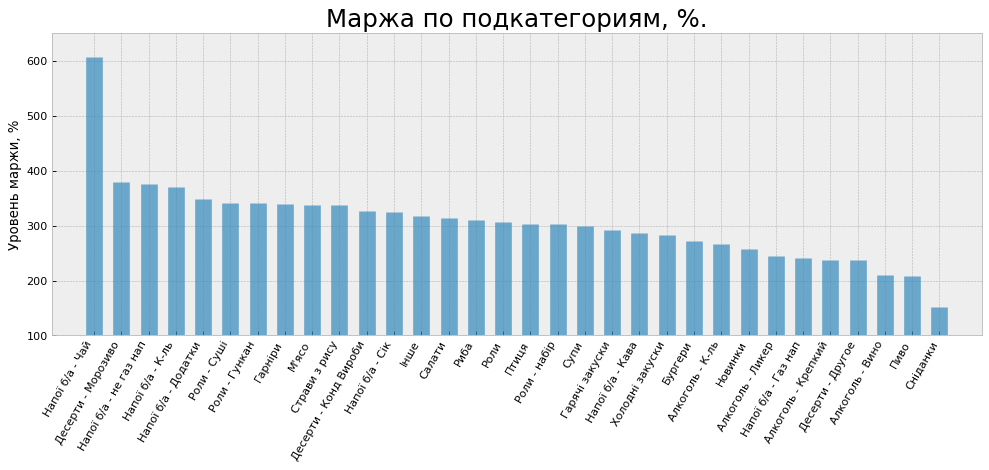

In [65]:
fig, ax = plt.subplots(figsize = (15,5), dpi= 80)

#df_group_sort_2=df_group.sort_values('Margin', ascending=[False])

ax.vlines(x=df_podcat_sort.index, ymin = 0, ymax=df_podcat_sort['Margin'], alpha=0.7, linewidth=15 )

ax.set_title('Маржа по подкатегориям, %.', fontdict={'size':22})
ax.set(ylabel='Уровень маржи, %', ylim=(100, 650))
plt.xticks( rotation=60, horizontalalignment='right')

In [66]:
#df_restoran['week'] = df_restoran['Время открытия'].dt.isocalendar().week
#df_restoran['day'] = df_restoran['Время открытия'].dt.isocalendar().day
#df_restoran['hour'] = df_restoran['Время открытия'].dt.hour
df_restoran.head()

,Торговое предприятие,Категория,Подкатегория,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-02 21:43:40,35479,1.0,300.0,196.10
1,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-03 19:17:07,35660,0.5,150.0,98.05
2,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-03 21:55:55,35662,0.5,150.0,98.05
3,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-05 18:24:26,35908,1.0,300.0,196.10
4,Ресторан,Алкоголь,Алкоголь - Вино,"2204109300 Visiega Cava Brut 0,75л",2021-01-25 13:00:03,36622,3.0,900.0,514.01


In [67]:
df_restoran_chek_group = df_restoran.groupby(['Номер чека']).sum()
df_restoran_chek_group['Margin'] = round(df_restoran_chek_group['Сумма со скидкой, грн.'] / df_restoran_chek_group['Себестоимость, грн.'] * 100, 2)
df_restoran_chek_group['hour'] = df_restoran['Время открытия'].dt.hour
df_restoran_chek_group 

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin,hour
Номер чека,,,,,
35277,3.0,84.0,18.603333,451.53,11
35279,0.1,360.0,140.530000,256.17,16
35280,9.0,75.0,35.956622,208.58,17
35281,2.0,10.0,6.077567,164.54,17
35282,19.0,2391.0,692.678750,345.18,14
...,...,...,...,...,...
66638,7.0,868.0,245.110667,354.13,9
66639,2.3,404.0,204.590000,197.47,10
66640,11.0,1910.0,543.930409,351.15,10


In [68]:
df_restoran_chek_100group = df_restoran_chek_group[df_restoran_chek_group['Сумма со скидкой, грн.'] < 100]
df_restoran_chek_100group

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin,hour
Номер чека,,,,,
35277,3.0,84.0,18.603333,451.53,11
35280,9.0,75.0,35.956622,208.58,17
35281,2.0,10.0,6.077567,164.54,17
35284,1.0,39.0,23.650000,164.90,20
35287,1.0,24.0,6.000000,400.00,18
...,...,...,...,...,...
66578,1.0,65.0,16.120000,403.23,11
66588,2.0,60.0,5.525667,1085.84,11
66614,3.0,0.0,92.975455,0.00,10


Text(0.5, 1.0, 'Разброс маржи по часам (чек до 100 грн)')

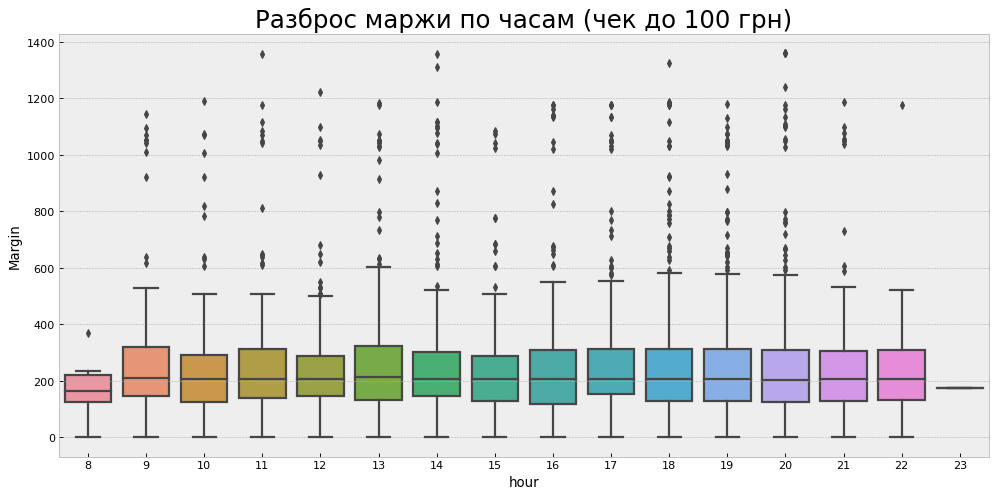

In [69]:
fig, ax = plt.subplots(figsize = (15,7), dpi= 80)
sns.boxplot(x = 'hour', y = 'Margin', data = df_restoran_chek_100group)
ax.set_title('Разброс маржи по часам (чек до 100 грн)', fontdict={'size':22})

In [70]:
df_restoran_chek_100_7500group = df_restoran_chek_group[(df_restoran_chek_group['Сумма со скидкой, грн.'] > 100) & (df_restoran_chek_group['Сумма со скидкой, грн.'] < 7500)]
df_restoran_chek_100_7500group

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin,hour
Номер чека,,,,,
35279,0.1,360.0,140.530000,256.17,16
35282,19.0,2391.0,692.678750,345.18,14
35285,3.0,261.0,89.488667,291.66,13
35286,10.0,560.0,182.103611,307.52,15
35288,15.0,617.0,185.743667,332.18,19
...,...,...,...,...,...
66638,7.0,868.0,245.110667,354.13,9
66639,2.3,404.0,204.590000,197.47,10
66640,11.0,1910.0,543.930409,351.15,10


Text(0.5, 1.0, 'Разброс маржи по часам (чек от 100 до 7500 грн)')

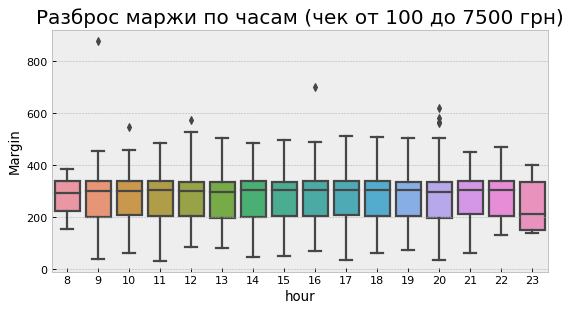

In [93]:
fig, ax = plt.subplots(figsize = (8,4), dpi= 80)
sns.boxplot(x = 'hour', y = 'Margin', data = df_restoran_chek_100_7500group)
ax.set_title('Разброс маржи по часам (чек от 100 до 7500 грн)', fontdict={'size':18})

In [72]:
df_restoran_chek_7500group = df_restoran_chek_group[df_restoran_chek_group['Сумма со скидкой, грн.'] > 7500]
df_restoran_chek_7500group

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin,hour
Номер чека,,,,,
35460,45.0,8159.0,2683.255262,304.07,13
36309,194.0,16960.0,5088.525732,333.30,9
38427,136.0,10197.9,3485.805466,292.56,18
40249,65.0,8890.0,2634.365762,337.46,20
45705,63.0,8525.0,2614.613186,326.05,19
46418,118.0,11892.0,3861.932263,307.93,13
46646,88.0,12089.0,3777.343332,320.04,16
49613,68.0,9469.0,2861.876393,330.87,14
51957,70.0,10112.0,3179.865687,318.00,20


In [73]:
dict_df = [['Чек до 100 грн', len(df_restoran_chek_100group)], ['Чек от 100 до 7500 грн', len(df_restoran_chek_100_7500group)], ['Чек от 7500 грн', len(df_restoran_chek_7500group)]]


In [74]:
df_chek_proportion=pd.DataFrame(dict_df, columns =['Размер чека', 'Количество чеков'])
df_chek_proportion['weight'] = round(df_chek_proportion['Количество чеков']/df_chek_proportion['Количество чеков'].sum()*100, 2)
df_chek_proportion

,Размер чека,Количество чеков,weight
0,Чек до 100 грн,6292,27.01
1,Чек от 100 до 7500 грн,16987,72.91
2,Чек от 7500 грн,20,0.09
